In [ ]:
import sqlite3
import pandas
import numpy

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head()

,yearID,total_payroll
0,1985,134401120.0
1,1986,157716444.0
2,1987,136088747.0
3,1988,157049812.0
4,1989,188771688.0


In [ ]:
# Problem 1
payrollwin = """ SELECT Teams.yearID, Teams.teamID, Teams.G, Teams.W, Teams.franchID, sum(Salaries.salary) as total_payroll
 FROM Salaries, Teams 
 WHERE Teams.teamID = Salaries.teamID and Teams.yearID = Salaries.yearID 
 GROUP BY Teams.teamID, Teams.yearID
 """

payrollwin = pandas.read_sql(payrollwin,conn)
pandas.set_option('display.max_rows', 10)
payrollwin['win_percentage'] = (payrollwin['W']/payrollwin['G'])*100
payrollwin['win_percentage'] = payrollwin['win_percentage'].astype(float)
print(payrollwin)
# So i began by using SQL to gather the information I needed. I summed all of 
# the salaries of each team to get the total_payroll. The teams ID and salaries ID
# need to match as well as the years for accurate results. We then group by years AND teams.
# I calculated win percentage with given formula.

     yearID teamID    G   W franchID  total_payroll  win_percentage
0      1997    ANA  162  84      ANA     31135472.0       51.851852
1      1998    ANA  162  85      ANA     41281000.0       52.469136
2      1999    ANA  162  70      ANA     55388166.0       43.209877
3      2000    ANA  162  82      ANA     51464167.0       50.617284
4      2001    ANA  162  75      ANA     47535167.0       46.296296
..      ...    ...  ...  ..      ...            ...             ...
853    2010    WAS  162  69      WSN     61400000.0       42.592593
854    2011    WAS  161  80      WSN     63856928.0       49.689441
855    2012    WAS  162  98      WSN     80855143.0       60.493827
856    2013    WAS  162  86      WSN    113703270.0       53.086420
857    2014    WAS  162  96      WSN    131983680.0       59.259259

[858 rows x 7 columns]


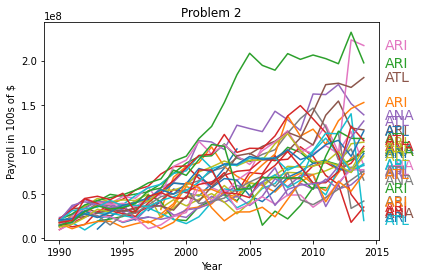

    yearID        avg_pr
0     1985  1.007557e+07
1     1986  1.184056e+07
2     1987  1.048367e+07
3     1988  1.155586e+07
4     1989  1.384599e+07
..     ...           ...
25    2010  9.071200e+07
26    2011  9.281684e+07
27    2012  9.775804e+07
28    2013  1.011509e+08
29    2014  9.980002e+07

[30 rows x 2 columns]


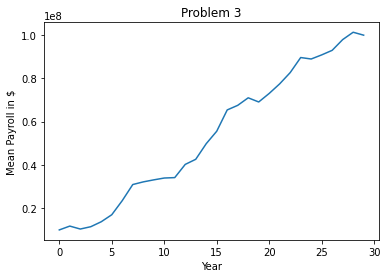

In [ ]:
# Problem 2
# For this problem we needed the payrolls of all of the teams over the years, so
# we group by teamID and plot x as years and y as payroll.
# Then I annotated the lines, poorly. Finished with labeling the axes.
import matplotlib.pyplot as plt
payrollwin = payrollwin.loc[payrollwin['yearID']>=1990]

fig, ax = plt.subplots()
payrollwin.groupby('teamID').plot(x='yearID', y='total_payroll', ax=ax,legend=False)

for line, name in zip(ax.lines, payrollwin['teamID']):
  y = line.get_ydata()[-1]
  ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(),
              xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

plt.xlabel('Year')
plt.ylabel('Payroll in 100s of $')
plt.title('Problem 2')
plt.show()

# Question 1: The main statement That I can make about the distribution of payrolls
# over time is that from 1990 to 2015, payroll has been increasing. 
# There was a max payroll of about 231 million and a minimum payroll of about
# 9.37 million. The mean payroll from 1990 - 2015 was 63 million, with a standard
# deviation of 38 million. The spread would be about 222 million.

# Problem 3
# For this problem, I need the avg of every teams payroll for each year. So, I 
# selected the basic three elements and joined with the average of the payrolls
# My dataframe had the year and the mean payroll.
ya = """ with tablet(yearID, teamID, payroll) as 
              (SELECT Teams.yearID, Teams.teamID, sum(Salaries.salary)
              FROM Salaries join Teams on Salaries.teamID=Teams.teamID and
              Salaries.yearID = Teams.yearID
              group by Teams.teamID, Teams.yearID)
              select yearID, avg(payroll) as avg_pr
              from tablet
              group by yearID
              ;
              """
meanpayroll = pandas.read_sql(ya,conn)
print(meanpayroll)
plt.plot(meanpayroll.avg_pr)
plt.ylabel('Mean Payroll in $')
plt.xlabel('Year')
plt.title('Problem 3')
plt.show()







     yearID teamID franID       avg_pr    win_per       yearID_bins
0      1997    ANA    ANA   31135472.0  51.851852  (1995.0, 2000.0]
1      1998    ANA    ANA   41281000.0  52.469136  (1995.0, 2000.0]
2      1999    ANA    ANA   55388166.0  43.209877  (1995.0, 2000.0]
3      2000    ANA    ANA   51464167.0  50.617284  (1995.0, 2000.0]
4      2001    ANA    ANA   47535167.0  46.296296  (2000.0, 2005.0]
..      ...    ...    ...          ...        ...               ...
853    2010    WAS    WSN   61400000.0  42.592593  (2005.0, 2010.0]
854    2011    WAS    WSN   63856928.0  49.689441  (2010.0, 2015.0]
855    2012    WAS    WSN   80855143.0  60.493827  (2010.0, 2015.0]
856    2013    WAS    WSN  113703270.0  53.086420  (2010.0, 2015.0]
857    2014    WAS    WSN  131983680.0  59.259259  (2010.0, 2015.0]

[728 rows x 6 columns]
30     ATL
31     ATL
32     ATL
33     ATL
34     ATL
      ... 
824    TOR
825    TOR
826    TOR
827    TOR
828    TOR
Name: teamID, Length: 162, dtype: objec

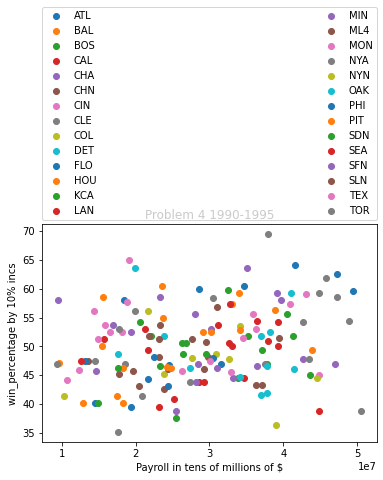

0      ANA
1      ANA
2      ANA
3      ANA
8      ARI
      ... 
829    TOR
830    TOR
831    TOR
832    TOR
833    TOR
Name: teamID, Length: 174, dtype: object


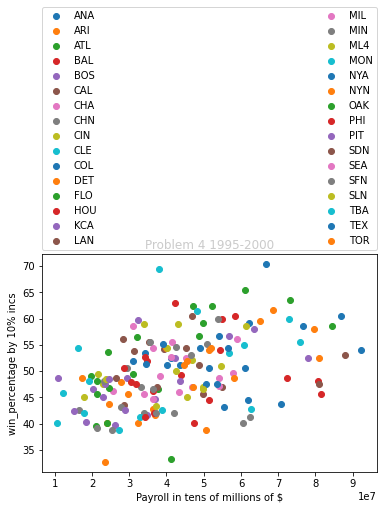

3      ANA
4      ANA
5      ANA
6      ANA
7      ANA
      ... 
835    TOR
836    TOR
837    TOR
838    TOR
848    WAS
Name: teamID, Length: 180, dtype: object


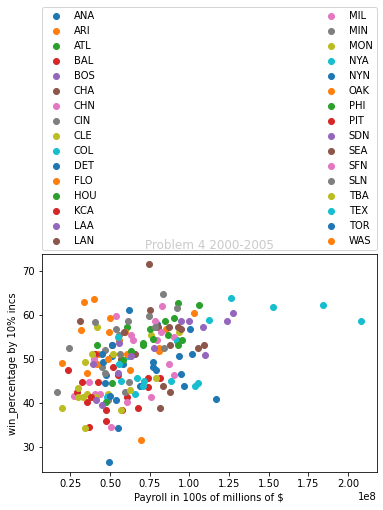

15     ARI
16     ARI
17     ARI
18     ARI
19     ARI
      ... 
849    WAS
850    WAS
851    WAS
852    WAS
853    WAS
Name: teamID, Length: 180, dtype: object


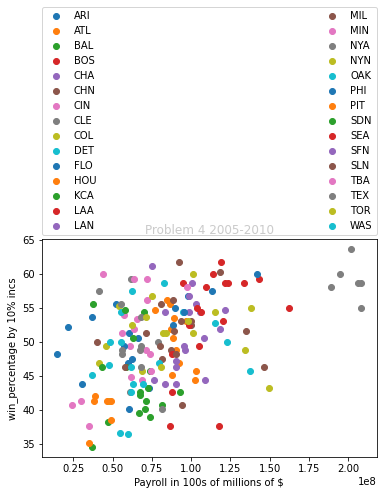

20     ARI
21     ARI
22     ARI
23     ARI
24     ARI
      ... 
853    WAS
854    WAS
855    WAS
856    WAS
857    WAS
Name: teamID, Length: 150, dtype: object


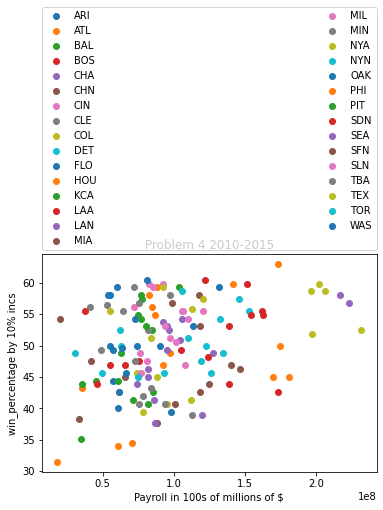

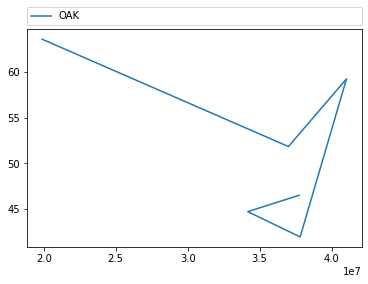

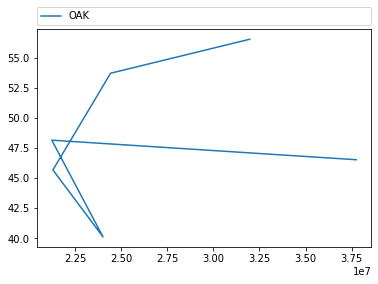

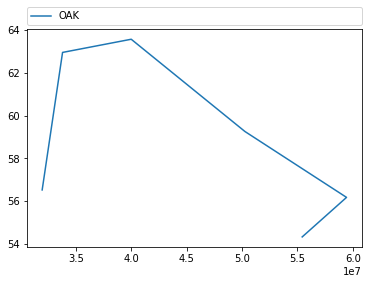

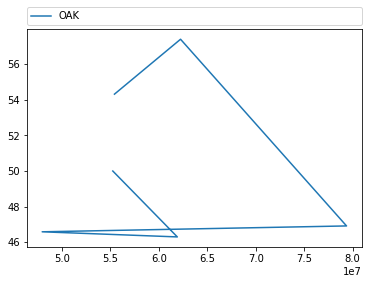

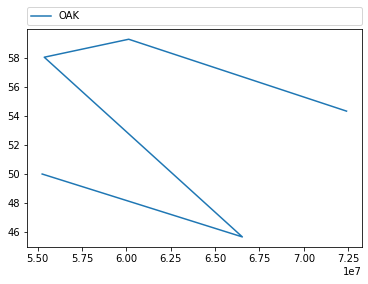

In [ ]:
# Problem 4: 
# For this problem, we wanted to do a scatterplot of each team's payroll vs win
# percentage. So I combined the two dataframes that we created in the earlier
# problems, cut them up by year and put them into bins. I had 5 bins so, I created
# five dataframes that i filled with the information that belonged in the respective
# one based on year bin. I scatterplot avg payroll vs win percentage and 
# use different colors to identify the teams. I then plotted only the Oakland
# A's so I could get a better look at just their information.
#
mwp = """ with tablet(yearID, franID, teamID, payroll) as 
              (SELECT Teams.yearID, Teams.franchID, Teams.teamID, sum(Salaries.salary)
              FROM Salaries join Teams on Salaries.teamID=Teams.teamID and
              Salaries.yearID = Teams.yearID
              group by Teams.teamID, Teams.yearID)
              select yearID, teamID, franID, avg(payroll) as avg_pr
              from tablet
              group by teamID, yearID
              ;
              """
mean_payroll_winper = pandas.read_sql(mwp,conn)
mean_payroll_winper['win_per'] = payrollwin['win_percentage']
mean_payroll_winper = mean_payroll_winper.loc[mean_payroll_winper['yearID']>=1990]
mean_payroll_winper['yearID_bins'] = pandas.cut(x=mean_payroll_winper['yearID'], bins= [1990, 1995, 2000, 2005, 2010, 2015], include_lowest=True)
print(mean_payroll_winper)
first = mean_payroll_winper.loc[(mean_payroll_winper['yearID']>=1990) & (mean_payroll_winper['yearID']<=1995)]
second =mean_payroll_winper.loc[(mean_payroll_winper['yearID']>=1995) & (mean_payroll_winper['yearID']<=2000)]
third = mean_payroll_winper.loc[(mean_payroll_winper['yearID']>=2000) & (mean_payroll_winper['yearID']<=2005)]
fourth = mean_payroll_winper.loc[(mean_payroll_winper['yearID']>=2005) & (mean_payroll_winper['yearID']<=2010)]
fifth = mean_payroll_winper.loc[(mean_payroll_winper['yearID']>=2010) & (mean_payroll_winper['yearID']<=2015)]
#####################################################
names = first.teamID
print(names)
groups = first.groupby("teamID")
for name, group in groups:
  plt.scatter(group['avg_pr'], group['win_per'],label=name)

plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Payroll in tens of millions of $')
plt.title('Problem 4 1990-1995')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
#######################################################
names = second.teamID
print(names)
groups = second.groupby("teamID")
for name, group in groups:
  plt.scatter(group['avg_pr'], group['win_per'],label=name)

plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Payroll in tens of millions of $')
plt.title('Problem 4 1995-2000')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
########################################################
names = third.teamID
print(names)
groups = third.groupby("teamID")
for name, group in groups:
  plt.scatter(group['avg_pr'], group['win_per'],label=name)
plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Payroll in 100s of millions of $')
plt.title('Problem 4 2000-2005')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
#######################################################
names = fourth.teamID
print(names)
groups = fourth.groupby("teamID")
for name, group in groups:
  plt.scatter(group['avg_pr'], group['win_per'],label=name)


plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Payroll in 100s of millions of $')
plt.title('Problem 4 2005-2010')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
#####################################################
names = fifth.teamID
print(names)
groups = fifth.groupby("teamID")
for name, group in groups:
  plt.scatter(group['avg_pr'], group['win_per'],label=name)
plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Payroll in 100s of millions of $')
plt.title('Problem 4 2010-2015')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()


groups = first.loc[first["teamID"] == 'OAK']
plt.plot(groups['avg_pr'], groups['win_per'], label = 'OAK')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

groups = second.loc[second["teamID"] == 'OAK']
plt.plot(groups['avg_pr'], groups['win_per'], label = 'OAK')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

groups = third.loc[third["teamID"] == 'OAK']
plt.plot(groups['avg_pr'], groups['win_per'], label = 'OAK')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

groups = fourth.loc[fourth["teamID"] == 'OAK']
plt.plot(groups['avg_pr'], groups['win_per'], label = 'OAK')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

groups = fifth.loc[fifth["teamID"] == 'OAK']
plt.plot(groups['avg_pr'], groups['win_per'], label = 'OAK')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()


###################################################
# QUESTION 2: Payrolls increased from 1990-2015. We can see that see Yankees are
# particularly good at "paying for wins", seeing that they are in the top right
# corner for all five graphs of payroll vs win percentage. In terms of the 
# Oakland A's spending efficiency, they are yet to have an over 80 million dollar
# payroll, but still have maintained above 50% win percentage in recent years.
# In the 2000-2005 Oakland A's graph, they dropped their payroll and their 
# win percentage was skyrocketing to above 60%. They had about a 63% win rate 
# with a 40 million dollar payroll. Impressive.


In [ ]:
# Problem 5: For this problem, i looped through the dataframe, fill an dataframe
# that changes every loop with all of the rows that had that same yearID and 
# use the statistics package to take the standard deviation and put that in an array.
# There number of rows worked out to 25, (1990-2014). I then calculate a standard
# payroll column based on the given formula.
import statistics
avgpayroll = meanpayroll.loc[meanpayroll['yearID']>=1990]
payrollwin = payrollwin.loc[payrollwin['yearID']>=1990]
stdevarr = []
i = 1990
ans = []
for year in avgpayroll.yearID:
  ayo = (payrollwin.loc[payrollwin['yearID']==i])
  ans.append(statistics.stdev(ayo.total_payroll))
  i = i + 1

avgpayroll['stdev'] = ans
print(avgpayroll)
data = pandas.merge(payrollwin, avgpayroll, on = 'yearID')
data['standardPR'] = (data['total_payroll']-data['avg_pr'])/(data['stdev'])
data




    yearID        avg_pr         stdev
5     1990  1.707235e+07  3.771834e+06
6     1991  2.357879e+07  6.894669e+06
7     1992  3.098244e+07  9.150607e+06
8     1993  3.220500e+07  9.232485e+06
9     1994  3.313701e+07  8.528749e+06
..     ...           ...           ...
25    2010  9.071200e+07  3.811503e+07
26    2011  9.281684e+07  4.081197e+07
27    2012  9.775804e+07  3.681754e+07
28    2013  1.011509e+08  4.883029e+07
29    2014  9.980002e+07  4.570505e+07

[25 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,yearID,teamID,G,W,franchID,total_payroll,win_percentage,avg_pr,stdev,standardPR
0,1997,ANA,162,84,ANA,31135472.0,51.851852,4.026021e+07,1.306073e+07,-0.698639
1,1997,ATL,162,101,ATL,52278500.0,62.345679,4.026021e+07,1.306073e+07,0.920185
2,1997,BAL,162,98,BAL,58516400.0,60.493827,4.026021e+07,1.306073e+07,1.397793
3,1997,BOS,162,78,BOS,43558750.0,48.148148,4.026021e+07,1.306073e+07,0.252554
4,1997,CHA,161,80,CHW,57740000.0,49.689441,4.026021e+07,1.306073e+07,1.338347
...,...,...,...,...,...,...,...,...,...,...
723,1996,SEA,161,85,SEA,41328501.0,52.795031,3.417798e+07,1.068853e+07,0.668989
724,1996,SFN,162,68,SFG,37144725.0,41.975309,3.417798e+07,1.068853e+07,0.277563
725,1996,SLN,162,88,STL,40269667.0,54.320988,3.417798e+07,1.068853e+07,0.569927
726,1996,TEX,163,90,TEX,39041528.0,55.214724,3.417798e+07,1.068853e+07,0.455024


538    ATL
539    BAL
540    BOS
541    CAL
542    CHA
      ... 
695    SEA
696    SFN
697    SLN
698    TEX
699    TOR
Name: teamID, Length: 162, dtype: object


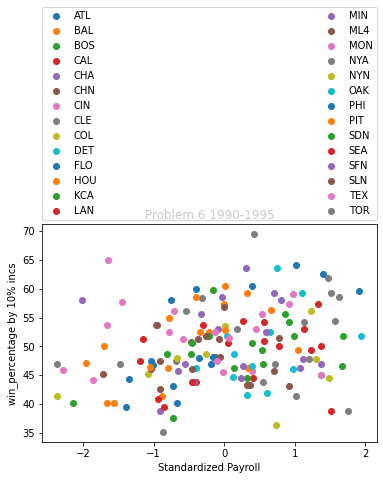

0      ANA
1      ATL
2      BAL
3      BOS
4      CHA
      ... 
723    SEA
724    SFN
725    SLN
726    TEX
727    TOR
Name: teamID, Length: 174, dtype: object


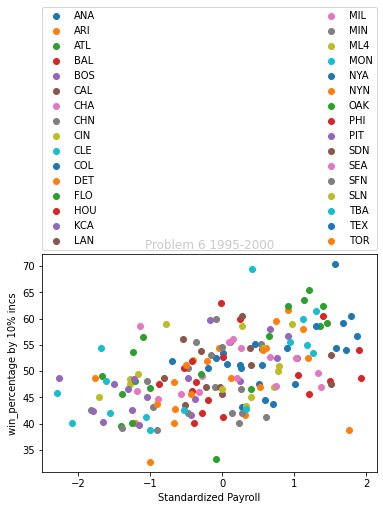

88     ANA
89     ARI
90     ATL
91     BAL
92     BOS
      ... 
263    SLN
264    TBA
265    TEX
266    TOR
267    WAS
Name: teamID, Length: 180, dtype: object


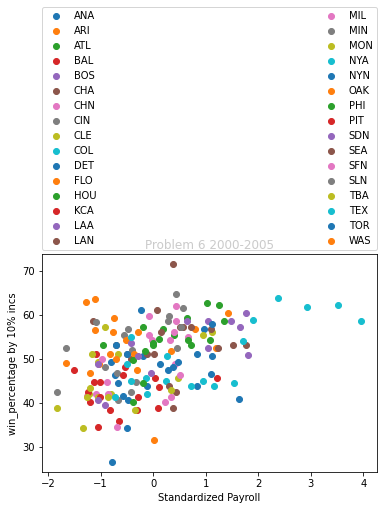

238    ARI
239    ATL
240    BAL
241    BOS
242    CHA
      ... 
413    SLN
414    TBA
415    TEX
416    TOR
417    WAS
Name: teamID, Length: 180, dtype: object


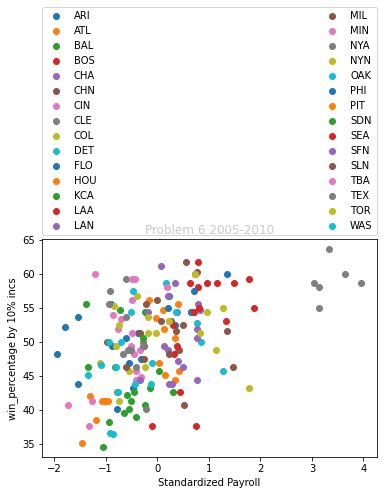

388    ARI
389    ATL
390    BAL
391    BOS
392    CHA
      ... 
533    SLN
534    TBA
535    TEX
536    TOR
537    WAS
Name: teamID, Length: 150, dtype: object


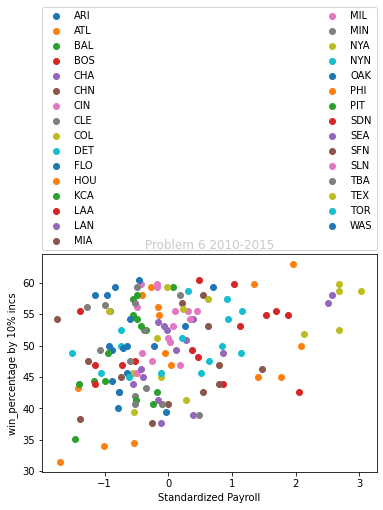

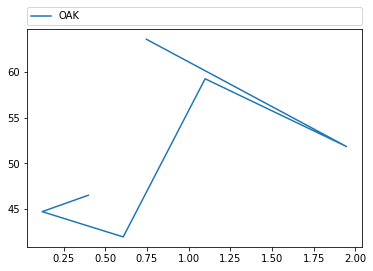

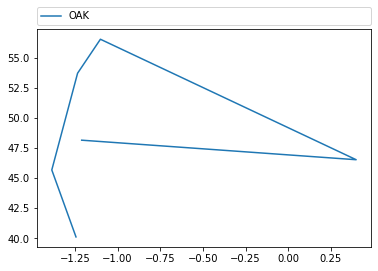

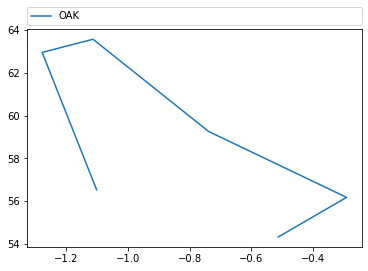

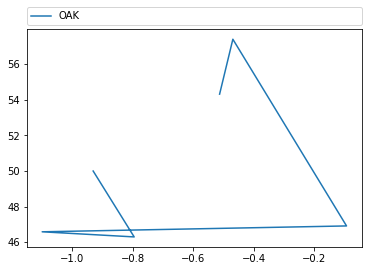

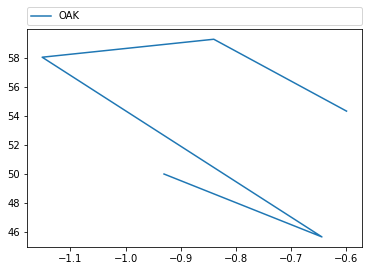

In [ ]:
#Problem 6: I copied and pasted from earlier and changed what I
# am plotting on the x axis
first = data.loc[(data['yearID']>=1990) & (data['yearID']<=1995)]
second =data.loc[(data['yearID']>=1995) & (data['yearID']<=2000)]
third = data.loc[(data['yearID']>=2000) & (data['yearID']<=2005)]
fourth = data.loc[(data['yearID']>=2005) & (data['yearID']<=2010)]
fifth = data.loc[(data['yearID']>=2010) & (data['yearID']<=2015)]
#####################################################
names = first.teamID
print(names)
groups = first.groupby("teamID")
for name, group in groups:
  plt.scatter(group['standardPR'], group['win_percentage'],label=name)

plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Standardized Payroll')
plt.title('Problem 6 1990-1995')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
#######################################################
names = second.teamID
print(names)
groups = second.groupby("teamID")
for name, group in groups:
  plt.scatter(group['standardPR'], group['win_percentage'],label=name)

plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Standardized Payroll')
plt.title('Problem 6 1995-2000')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
########################################################
names = third.teamID
print(names)
groups = third.groupby("teamID")
for name, group in groups:
  plt.scatter(group['standardPR'], group['win_percentage'],label=name)
plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Standardized Payroll')
plt.title('Problem 6 2000-2005')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
#######################################################
names = fourth.teamID
print(names)
groups = fourth.groupby("teamID")
for name, group in groups:
  plt.scatter(group['standardPR'], group['win_percentage'],label=name)


plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Standardized Payroll')
plt.title('Problem 6 2005-2010')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()
#####################################################
names = fifth.teamID
print(names)
groups = fifth.groupby("teamID")
for name, group in groups:
  plt.scatter(group['standardPR'], group['win_percentage'],label=name)
plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Standardized Payroll')
plt.title('Problem 6 2010-2015')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

groups = first.loc[first["teamID"] == 'OAK']
plt.plot(groups['standardPR'], groups['win_percentage'], label = 'OAK')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

groups = second.loc[second["teamID"] == 'OAK']
plt.plot(groups['standardPR'], groups['win_percentage'], label = 'OAK')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

groups = third.loc[third["teamID"] == 'OAK']
plt.plot(groups['standardPR'], groups['win_percentage'], label = 'OAK')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

groups = fourth.loc[fourth["teamID"] == 'OAK']
plt.plot(groups['standardPR'], groups['win_percentage'], label = 'OAK')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

groups = fifth.loc[fifth["teamID"] == 'OAK']
plt.plot(groups['standardPR'], groups['win_percentage'], label = 'OAK')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()


#############################################################
# Question 3: With the new standardized payroll variable,
# we are essentially plotting z scores of payroll vs winning percentage
# From this we can see that the Yankees are in the top top percentile 
# when it comes to payroll. We can also see that the Oakland A's are
# below the mean normally after 1995. They usually reside in the 16.5-50th
# percentile. The Oakland A's were about a standard deviation to the left when 
# their win percentage was in the 60s. Impeccable!


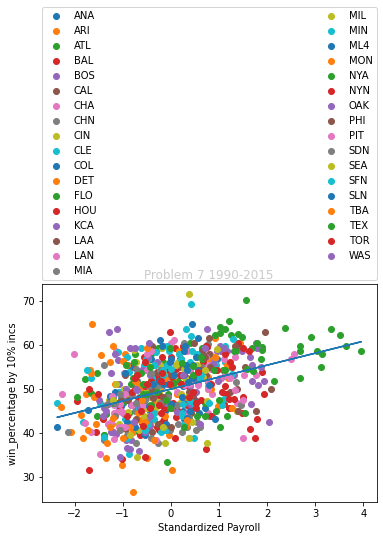

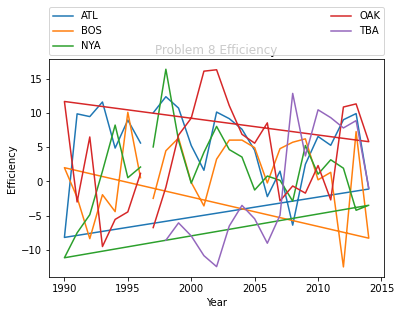

In [ ]:
import numpy
#Problem 7: I plot standard payroll vs win percentage with colors for each team 
# and add a regression line.
# I used given formula to create and expected wins column.

names = data.teamID
groups = data.groupby("teamID")
for name, group in groups:
  plt.scatter(group['standardPR'], group['win_percentage'],label=name)
plt.ylabel('win_percentage by 10% incs')
plt.xlabel('Standardized Payroll')
plt.title('Problem 7 1990-2015')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
x =data['standardPR']
y = data['win_percentage']
m, b = numpy.polyfit(x,y,1)
plt.plot(x, m*x + b)
plt.show()
data['expected_wins'] = 50 + 2.5*data['standardPR']

#Problem 8: I created an efficiency column based on given formula and created
# a new dataframe with only the data from 5 big teams. I plotted the year vs the
# efficiency (weird in my opinion, I thought year always is on the y axis).
data['efficiency'] = data['win_percentage'] - data['expected_wins']
data2 = data.loc[(data['teamID'] == 'OAK') | (data['teamID'] == 'NYA') | (data['teamID'] == 'BOS') | (data['teamID'] == 'ATL') | (data['teamID'] == 'TBA')]
data2
groups3 = data2.groupby('teamID')
for name, group in groups3:
  plt.plot(group['yearID'], group['efficiency'],label=name)

plt.ylabel('Efficiency')
plt.xlabel('Year')
plt.title('Problem 8 Efficiency')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

##############################################################
# Question 4: From this plot, we can gather more information than the other plots
# because this plot incorporates the elements from the other two plots to create
# a efficiency variable.
# In the 2000 - 2005 years, the Oakland Athletics are at the top of
# the efficiency chart, meaning they were using their money wisely to help them
# win more games.